## Multivariate Linear Regression in Python WITHOUT Scikit-Learn

### Importing Libraries and Getting Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


my_data =  pd.read_csv("Data/home.txt", names=["sizes","bedroom", "price"])
my_data.head(10)

,sizes,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


### Normalizing the Data

In [4]:
my_data = (my_data - my_data.mean())/my_data.std()
my_data.head()

,sizes,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


### Create Matrices and Set Hyperparameters

In [5]:
#setting the matrixes
X = my_data.iloc[:,0:2]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y = my_data.iloc[:,2:3].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,3])

#set hyper parameters
alpha = 0.01
iters = 1000

### Create Cost Function

In [8]:
def computeCost(X, y, theta):
    tobesummed =  np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2*len(X))
    

### Create the Gradient Descent Function:

In [9]:
#gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)

[[-1.10910099e-16  8.78503652e-01 -4.69166570e-02]]
0.1307033696077189


### The Cost Plot:

Text(0.5, 1.0, 'Error vs. Training Epoch')

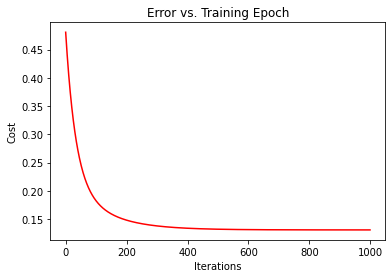

In [11]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  